In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'test.csv'
test = pd.read_csv(path + trainfile)
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)
ad = pd.read_csv(path + 'ad.csv')

test.drop('instanceID', axis=1, inplace=True)
train = pd.concat([train, test])

In [2]:
train = pd.merge(train, ad, on='creativeID', how='left')
train.head()

clickTime  connectionType  conversionTime  creativeID  label  positionID  \
0     170000               1             NaN        3089      0         293   
1     170000               1             NaN        1259      0        6161   
2     170000               4             NaN        4465      0        7434   
3     170000               1             NaN        1004      0         977   
4     170000               1             NaN        1887      0        3688   

   telecomsOperator   userID  adID  camgaignID  advertiserID  appID  \
0                 1  2798058  1321          83            10    434   
1                 2   463234  1535         685            80     14   
2                 1  1857485   147         460             3    465   
3                 1  2038823   411         564             3    465   
4                 1  2015141   369         144            84    360   

   appPlatform  
0            1  
1            2  
2            1  
3            1  
4            1

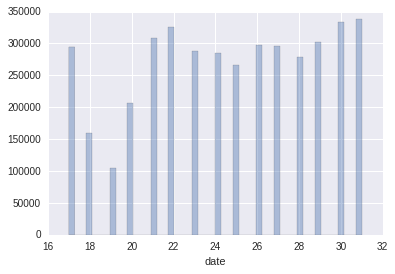

In [3]:
# 测试集只有一天
var = 'date'
train[var] = (train['clickTime'].values) / 10000
# test[var] = property(var, train)
sns.distplot(train[var], kde=False)

In [4]:
test = {}
def property(var, train):
    # 点击量的统计直方图     
    sns.distplot(train[var], kde=False)
    # means = train.groupby(var)['date'].mean()
    group = train.groupby('date')[var]
    means = group.mean()
    std = group.std()
    # 根据var属性的每一个取值做均值     
    fig = plt.figure()
    plt.scatter(x=means.index, y = means.values)
    fig = plt.figure()
    plt.scatter(x=std.index, y = std.values)
    # 按顺序画散点图
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    # 方差存储的是不同天的var属性的方差，std.std()     
    return (var, len(train[var].value_counts()),std.max()-std.min(), std.std(), sort_means.max() - sort_means.min(), sort_means.std())

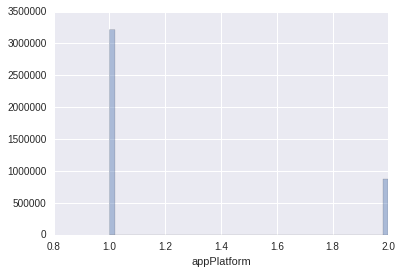

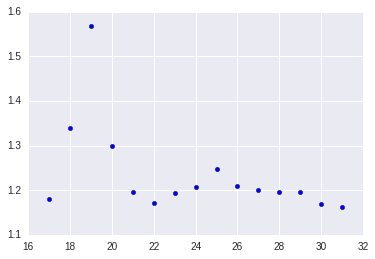

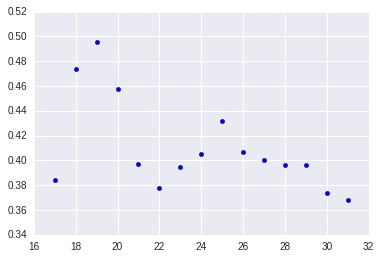

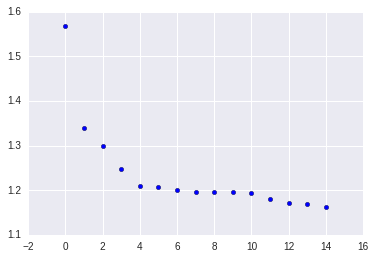

In [5]:
# 存在安卓、苹果、未知
var = 'appPlatform'
test[var] = property(var, train)

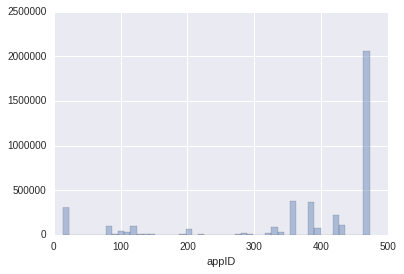

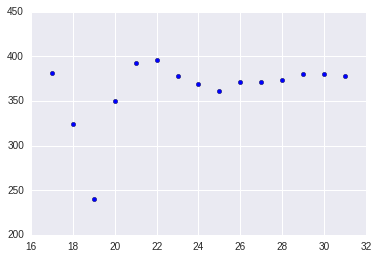

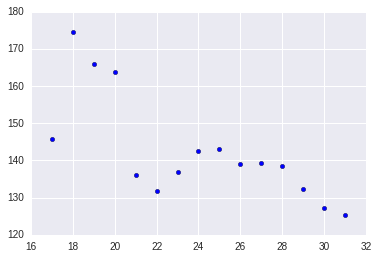

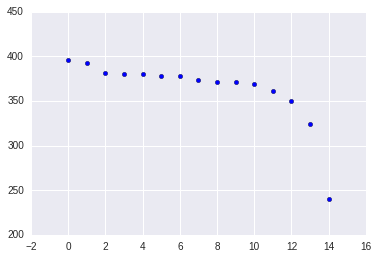

In [6]:
# 广告的appID
var = 'appID'
test[var] = property(var, train)

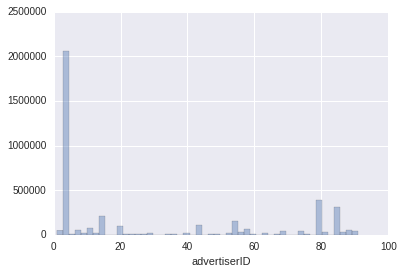

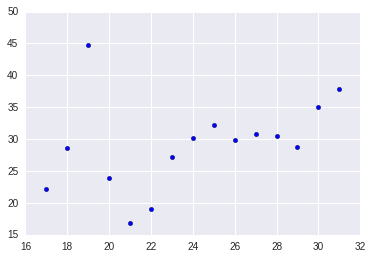

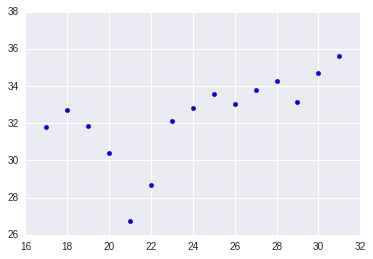

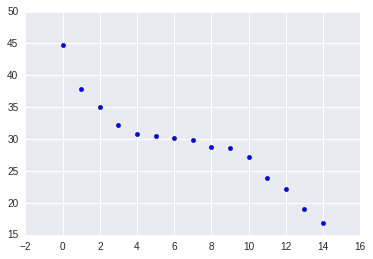

In [7]:
var = 'advertiserID'
test[var] = property(var, train)

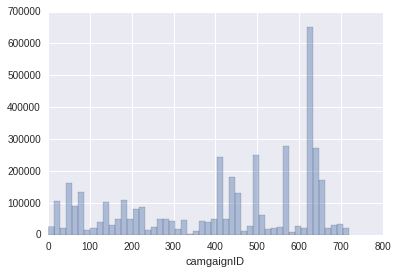

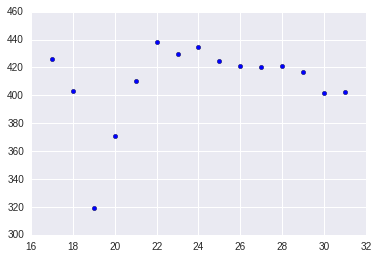

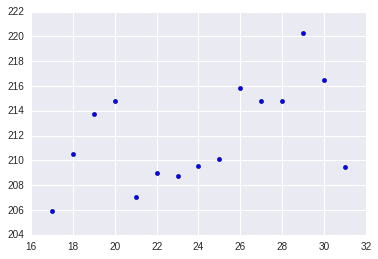

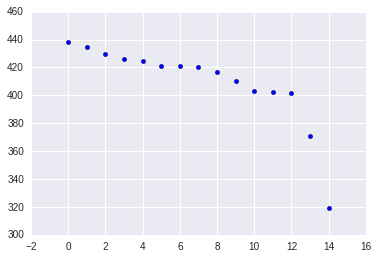

In [8]:
# camgaignID
var = 'camgaignID'
test[var] = property(var, train)

In [9]:
var = 'camgaignID'
# 把出现次数少于一定数目的统一编码
# print train[var].value_counts()
count = train[var].value_counts(sort=True, ascending=False)
tmp1 = count.values < 200
train[var].replace(count[tmp1].index, 808, inplace = True)
type(count)

pandas.core.series.Series

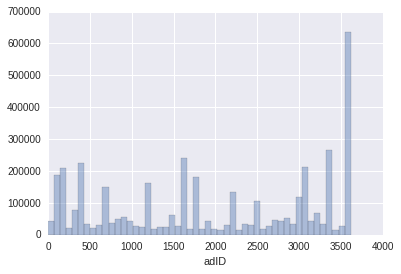

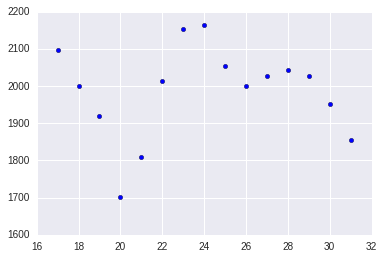

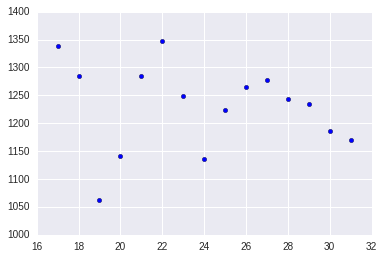

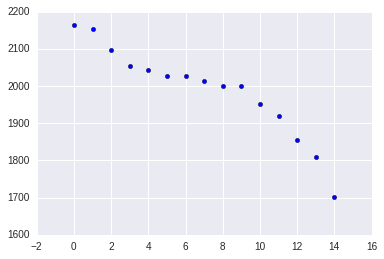

In [10]:
var = 'adID' 
test[var] = property(var, train)

In [11]:
for (k,v) in test.items():
    print v

('advertiserID', 91, 8.8512962209243931, 2.300672857292509, 27.848903931263365, 7.074188844290223)
('adID', 3616, 284.33490398943582, 78.184047865819082, 461.48487164786479, 125.03574464982984)
('appID', 50, 49.388970728999283, 14.411333380209721, 155.25654255462155, 38.035614265152319)
('camgaignID', 720, 14.407525171486697, 4.0543888902763401, 118.57963940266751, 29.957561526590645)
('appPlatform', 2, 0.12734175174527373, 0.037574032205801092, 0.40490198374594844, 0.10387374446990164)


date      adID  camgaignID  advertiserID     appID  \
date          1.000000 -0.003826    0.003612      0.116207  0.048617   
adID         -0.003826  1.000000    0.301439     -0.048756  0.015608   
camgaignID    0.003612  0.301439    1.000000     -0.208785  0.163974   
advertiserID  0.116207 -0.048756   -0.208785      1.000000 -0.644485   
appID         0.048617  0.015608    0.163974     -0.644485  1.000000   
appPlatform  -0.073935  0.012306   -0.114971      0.411637 -0.895648   

              appPlatform  
date            -0.073935  
adID             0.012306  
camgaignID      -0.114971  
advertiserID     0.411637  
appID           -0.895648  
appPlatform      1.000000

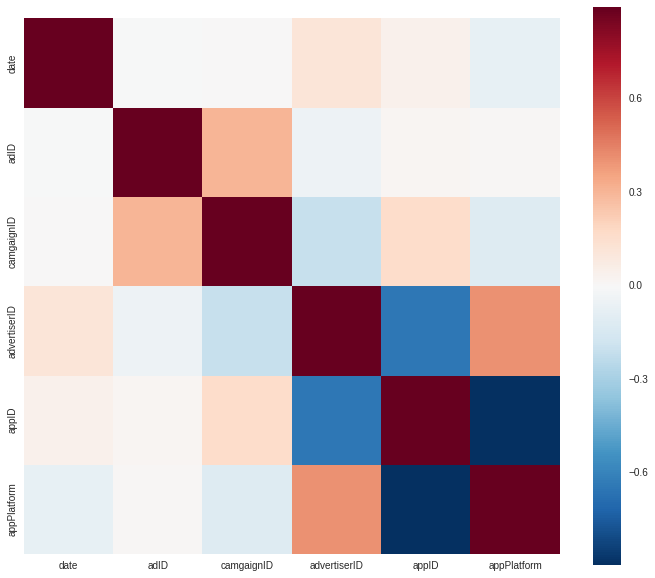

In [12]:
feats = ['date', 'adID', 'camgaignID','advertiserID','appID','appPlatform']
corr = train[feats].corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True)
corr